In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pystan
import seaborn as sns
%matplotlib inline

In [4]:
stan_data = {'alpha':4.48, 'beta':0.76, 'sigma2':81.14, 'J':3, 'y':np.array([21,20,15]), 'Z':np.array([10,30,50]), 'n':np.array([48,34,21])}

In [6]:
fit = pystan.stan(file='air.stan', data=stan_data, iter=10000, chains=3, thin=1)

In [7]:
fit

Inference for Stan model: anon_model_65ffb40a6246975e14aef0f21df1ec92.
3 chains, each with iter=10000; warmup=5000; thin=1; 
post-warmup draws per chain=5000, total post-warmup draws=15000.

         mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
theta1  -0.97    0.03   1.15  -4.03  -1.29  -0.71  -0.32   0.28   1099    1.0
theta2   0.05  1.3e-3   0.04 1.1e-4   0.02   0.04   0.06   0.16   1104    1.0
X[0]    13.36    0.17   8.43  -3.99   7.76  13.62  19.23  29.34   2349    1.0
X[1]     27.7    0.14   7.58  13.02  22.57   27.7  32.66  42.94   3149    1.0
X[2]    41.03    0.16   8.61  24.45  35.08  40.87  46.73  58.27   2879    1.0
lp__   -71.06    0.03   1.62 -75.06  -71.9 -70.72 -69.87 -68.91   2754    1.0

Samples were drawn using NUTS(diag_e) at Sun Sep 25 00:50:02 2016.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).

In [8]:
ex = fit.extract(permuted=True)

/Users/yuki.ohnishi/.pyenv/versions/analysis/lib/python3.5/site-packages/seaborn/categorical.py:2296: UserWarning: The violinplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)


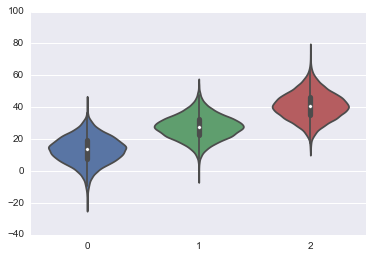

In [14]:
sns.violinplot(pd.DataFrame(ex["X"]))


/Users/yuki.ohnishi/.pyenv/versions/analysis/lib/python3.5/site-packages/seaborn/categorical.py:2296: UserWarning: The violinplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)


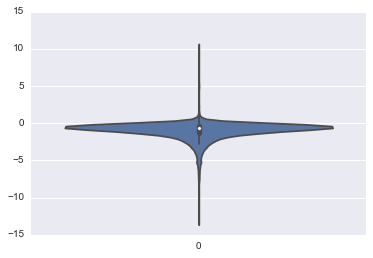

In [15]:
sns.violinplot(pd.DataFrame(ex["theta1"]))


/Users/yuki.ohnishi/.pyenv/versions/analysis/lib/python3.5/site-packages/seaborn/categorical.py:2296: UserWarning: The violinplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)


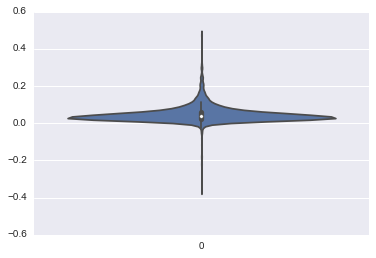

In [16]:
sns.violinplot(pd.DataFrame(ex["theta2"]))

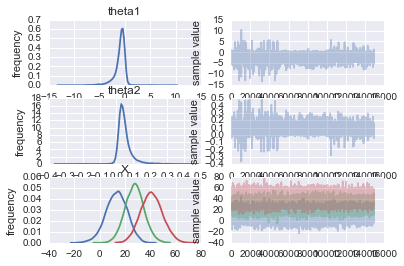

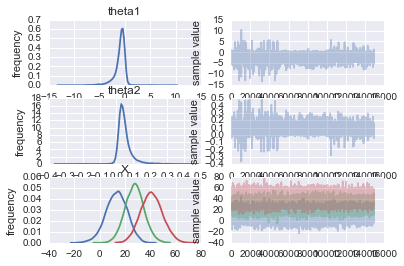

In [18]:
fit.plot()

In [24]:
theta1 = ex["theta1"]

/Users/yuki.ohnishi/.pyenv/versions/analysis/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


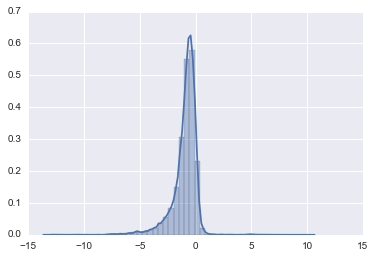

In [25]:
sns.distplot(theta1)

In [26]:
import statsmodels.api as sm
kde = sm.nonparametric.KDEUnivariate(theta1)
kde.fit()
theta_peak = kde.support[kde.density.argmax()]
theta_peak

/Users/yuki.ohnishi/.pyenv/versions/analysis/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


-0.52347590845815084